This project leverages NASA's open APIs to explore and analyze celestial data, focusing on fireballs, potential asteroid impacts, and close approaches of comets and asteroids. It aims to address three main questions: the relationship between time of day and fireball frequency, the risk of asteroid impacts based on the Sentry API, and the correlation between close approaches and fireball occurrences. By integrating and visualizing data from multiple datasets and performing statistical analyses, the project highlights significant insights, such as a statistically significant correlation between close approaches and fireballs, though causality remains uncertain. Challenges included navigating extensive datasets and forming actionable hypotheses, but the findings contribute to understanding celestial phenomena and emphasize the role of technological advancements in detection accuracy.

FIREBALL API

In [ ]:
import requests, matplotlib


api_key = "MhH0v8b6l343xqOaOAa949bly1Fjlp080clXjSvA"


fireball_url = "https://ssd-api.jpl.nasa.gov/fireball.api"
params = {
}
response = requests.get(fireball_url, params=params)
if response.status_code == 200:
    fireball_data = response.json()
    print(fireball_data)
else:
    print(f"Error: {response.status_code}")


{'signature': {'source': 'NASA/JPL Fireball Data API', 'version': '1.0'}, 'count': '1003', 'fields': ['date', 'energy', 'impact-e', 'lat', 'lat-dir', 'lon', 'lon-dir', 'alt', 'vel'], 'data': [['2024-12-01 08:50:16', '13.0', '0.38', '42.7', 'S', '172.4', 'W', '35.9', '22.1'], ['2024-11-29 22:18:15', '2.7', '0.095', '74.6', 'S', '4.4', 'E', '68.5', None], ['2024-11-29 17:57:18', '5.8', '0.19', '79.4', 'S', '74.6', 'E', '62.0', None], ['2024-11-10 16:31:52', '5.7', '0.18', '59.8', 'S', '73.6', 'W', '43', None], ['2024-10-22 10:54:48', '4.5', '0.15', '30.0', 'N', '136.0', 'W', '38.2', None], ['2024-10-05 12:27:48', '2.7', '0.095', '55.9', 'S', '102.4', 'W', '39.5', '13.1'], ['2024-09-28 00:10:19', '10.8', '0.32', '59.8', 'S', '51.8', 'W', '34.2', '15.0'], ['2024-09-23 06:37:47', '5.5', '0.18', '45.6', 'S', '31.9', 'W', '69.0', None], ['2024-09-06 12:36:22', '2.1', '0.076', '12.9', 'S', '117.7', 'E', '27.0', '22.6'], ['2024-09-04 16:39:32', '6.2', '0.2', '18.0', 'N', '122.9', 'E', '25.0', '

In [ ]:
# Extract fields and data from response
fields = fireball_data.get("fields", [])
records = fireball_data.get("data", [])

#list of dictionaries
processed_data = [dict(zip(fields, record)) for record in records]
processed_data_as_list = [str(record) for record in processed_data]
print(processed_data_as_list[:10])  # Print the first 10 records


["{'date': '2024-12-01 08:50:16', 'energy': '13.0', 'impact-e': '0.38', 'lat': '42.7', 'lat-dir': 'S', 'lon': '172.4', 'lon-dir': 'W', 'alt': '35.9', 'vel': '22.1'}", "{'date': '2024-11-29 22:18:15', 'energy': '2.7', 'impact-e': '0.095', 'lat': '74.6', 'lat-dir': 'S', 'lon': '4.4', 'lon-dir': 'E', 'alt': '68.5', 'vel': None}", "{'date': '2024-11-29 17:57:18', 'energy': '5.8', 'impact-e': '0.19', 'lat': '79.4', 'lat-dir': 'S', 'lon': '74.6', 'lon-dir': 'E', 'alt': '62.0', 'vel': None}", "{'date': '2024-11-10 16:31:52', 'energy': '5.7', 'impact-e': '0.18', 'lat': '59.8', 'lat-dir': 'S', 'lon': '73.6', 'lon-dir': 'W', 'alt': '43', 'vel': None}", "{'date': '2024-10-22 10:54:48', 'energy': '4.5', 'impact-e': '0.15', 'lat': '30.0', 'lat-dir': 'N', 'lon': '136.0', 'lon-dir': 'W', 'alt': '38.2', 'vel': None}", "{'date': '2024-10-05 12:27:48', 'energy': '2.7', 'impact-e': '0.095', 'lat': '55.9', 'lat-dir': 'S', 'lon': '102.4', 'lon-dir': 'W', 'alt': '39.5', 'vel': '13.1'}", "{'date': '2024-09-2

We predict that there will be more fireballs between midnight and noon since these are the times at which the surface of the earth is facing the direction that it is traveling in it's orbit. In theory, this should increase the frequency of fireball occurances, since the Earth passes through space debris as it moves in its orbit.

In [ ]:
from datetime import datetime, timedelta

# first we have to convert longitude to local time
def calculate_local_time(longitude, utc_datetime):
    #hours
    timezone_offset = longitude / 15
    #UTC time to local time
    local_time = utc_datetime + timedelta(hours=timezone_offset)
    return local_time
midnight_to_noon_count = 0
noon_to_midnight_count = 0

for fireball in processed_data:
    # Parse
    utc_datetime = datetime.strptime(fireball['date'], '%Y-%m-%d %H:%M:%S')

    # Check if longitude is not None
    if fireball['lon'] is not None:
        # Determine longitude (negative for W, positive for E)
        longitude = float(fireball['lon'])
        if fireball['lon-dir'] == 'W':
            longitude = -longitude
    else:
        # If longitude is None, skip this record or handle as needed
        continue  # Skip the current iteration if longitude is None

    # Convert to local time
    local_time = calculate_local_time(longitude, utc_datetime)
    # Check if local time is between midnight and noon
    if 0 <= local_time.hour < 12:
        midnight_to_noon_count += 1
    else:
        noon_to_midnight_count += 1

print(f"Fireballs at Night: {midnight_to_noon_count}, Fireballs During Day: {noon_to_midnight_count}")
print(f"Night to Day Fireball Ratio: {midnight_to_noon_count / noon_to_midnight_count}")


Fireballs at Night: 399, Fireballs During Day: 413
Night to Day Fireball Ratio: 0.9661016949152542


Our hypthesis was wrong :(

SENTRY API

We want to analyze the Torino Scale values for all Sentry objects in the next 100 years.

In [ ]:
import matplotlib.pyplot as plt
url = "https://ssd-api.jpl.nasa.gov/sentry.api"

# Mode S
response = requests.get(url)
data = response.json()
ts_values = []


# Process the data
if 'data' in data:
    for obj in data['data']:
        ts_max = obj.get('ts_max', None)  # Maximum Torino Scale value

        # ignore None
        if ts_max is not None:
            ts_values.append(float(ts_max))



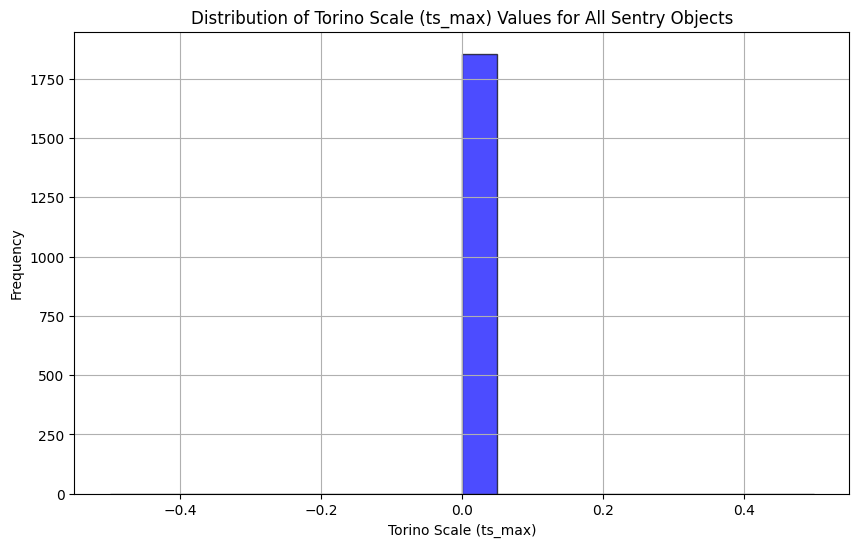

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(ts_values, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Torino Scale (ts_max) Values for All Sentry Objects")
plt.xlabel("Torino Scale (ts_max)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
# Count how many ts_max values do not equal 0
non_zero_ts_max_count = sum(1 for ts in ts_values if ts != 0)
print(f"Number of ts_max values not equal to 0: {non_zero_ts_max_count}")

Number of ts_max values not equal to 0: 0


This is good for humanity, but bad for our statistical analysis.

We are going to examine an alternative scale, the Palermo Scale.

Number of objects in the dataset: 1858


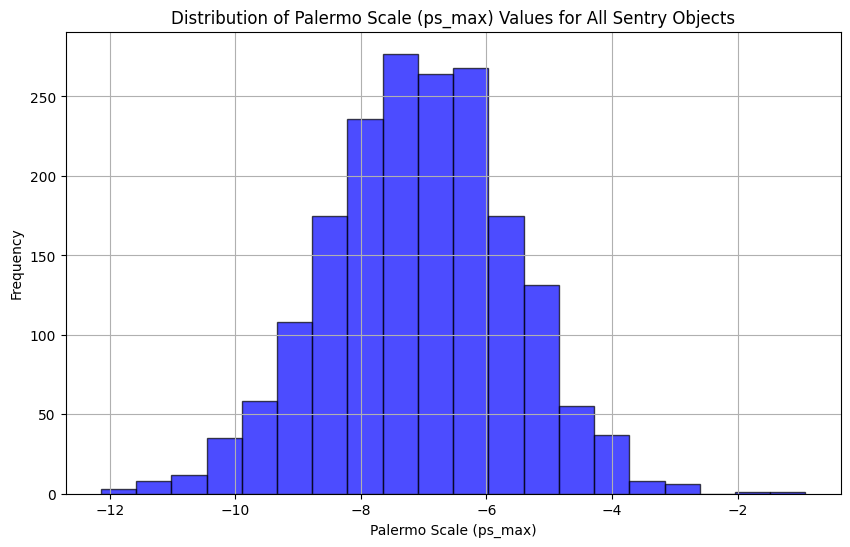

In [ ]:
import requests
import matplotlib.pyplot as plt
url = "https://ssd-api.jpl.nasa.gov/sentry.api"

#Mode S
response = requests.get(url)
data = response.json()
ps_max_values = []
if 'data' in data:
    # Count the number of objects in the data
    num_objects = len(data['data'])
    print(f"Number of objects in the dataset: {num_objects}")

    for obj in data['data']:
        ps_max = obj.get('ps_max', None)  # Maximum Palermo Scale value

        if ps_max is not None:
            ps_max_values.append(float(ps_max))  # Add ps_max to the list

#Histogram
plt.figure(figsize=(10, 6))
plt.hist(ps_max_values, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Palermo Scale (ps_max) Values for All Sentry Objects")
plt.xlabel("Palermo Scale (ps_max)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



According to NASA: "Palermo Scale values between -2 and 0 indicate situations that merit careful monitoring. Potential impacts with positive Palermo Scale values will generally indicate situations that merit some level of concern."

In [ ]:
# objects have ps_max > -2
count_minus_2 = sum(1 for ps in ps_max_values if ps > -2)
print(f"Number of objects with ps_max > -2: {count_minus_2}")

Number of objects with ps_max > -2: 2


There are only two Sentry objects with Palermo Scale values greater than -2.

In [ ]:

filtered_objects = []

# Process the data
if 'data' in data:
    for obj in data['data']:
        ps_max = obj.get('ps_max', None)  # Maximum Palermo Scale value


        if ps_max is not None and float(ps_max) > -2:
            filtered_objects.append(obj)  # Store the raw object data

# Print the raw data for the objects with ps_max > -2
for obj in filtered_objects:
    print("\nRaw data for object:")
    print(obj)



Raw data for object:
{'last_obs': '2020-10-3.80160', 'diameter': '0.49', 'ip': '0.000571699999999996', 'des': '101955', 'v_inf': '5.9916984432395', 'last_obs_jd': '2459126.3016', 'h': '20.63', 'ps_cum': '-1.40', 'fullname': '101955 Bennu (1999 RQ36)', 'ps_max': '-1.59', 'range': '2178-2290', 'n_imp': 157, 'id': 'a0101955', 'ts_max': None}

Raw data for object:
{'ip': '3.860e-04', 'des': '29075', 'v_inf': '14.10', 'h': '17.94', 'last_obs_jd': '2460654.5', 'ps_cum': '-0.92', 'last_obs': '2024-12-10', 'diameter': '1.3', 'id': 'a0029075', 'ts_max': None, 'fullname': '29075 (1950 DA)', 'ps_max': '-0.92', 'range': '2880-2880', 'n_imp': 1}


Object: 101955 Bennu (1999 RQ36):

ps_max = -1.59: This object has a low Palermo Scale hazard rating, indicating it poses a small impact risk. The negative value means the risk is low but not negligible.
Potential Impact Range: 2178-2290: The object could potentially impact Earth anytime between the years 2178 and 2290, but the chance is very low.
v_inf = 5.99 km/s: This is the object's speed relative to Earth, around 5.99 kilometers per second.
ip = 0.00057: This is the probability of an impact occurring, which is quite low (0.057% chance).

Object: 29075 (1950 DA):

ps_max = -0.91: The Palermo Scale value is slightly less negative, meaning the risk is still low but higher than Bennu's risk.
Potential Impact Range: 2880-2880: The object is expected to be a potential risk in the year 2880.
v_inf = 14.1 km/s: The object's speed relative to Earth is 14.1 kilometers per second, faster than Bennu.
ip = 0.0003968: This gives a 0.04% chance of impact, still a very low probability.


In [ ]:
import requests
import json
base_url = "https://ssd-api.jpl.nasa.gov/sentry.api?des="


objects = ["101955", "29075"]

# Function to find the event with the highest probability
def find_highest_probability(events):

    highest_probability = 0
    highest_event = None
    for event in events:
        #  probability (ip) and energy
        ip = event.get('ip', None)
        energy = event.get('energy', None)

        # Update if the current event's ip is higher
        if ip and energy and float(ip) > highest_probability:
            highest_probability = float(ip)
            highest_event = event

    return highest_event, highest_probability
#detailed data
for obj in objects:
    url = base_url + obj
    response = requests.get(url)
    data = response.json()

    #raw data in order to find the highest probability event
    if 'data' in data:
        print(f"\nRaw data for object {obj}:")
        print(json.dumps(data['data'], indent=2))

        #highest probability
        highest_event, highest_probability = find_highest_probability(data['data'])
        if highest_event:
            print(f"\nEvent with highest probability for {obj}:")
            print(f"Date: {highest_event['date']}")
            print(f"Probability (ip): {highest_probability}")
            print(f"Energy: {highest_event['energy']} megatons of TNT")
        else:
            print(f"No valid events found for object {obj}")
    else:
        print(f"No data found for object {obj}")



Raw data for object 101955:
[
  {
    "energy": "1.425e+03",
    "sigma_mc": "2.1605",
    "ip": "1.000e-07",
    "ps": "-5.38",
    "date": "2290-09-25.12",
    "ts": null
  },
  {
    "ts": null,
    "date": "2281-09-24.57",
    "ps": "-5.37",
    "energy": "1.420e+03",
    "sigma_mc": "2.0531",
    "ip": "1.000e-07"
  },
  {
    "date": "2272-09-24.38",
    "ts": null,
    "ip": "1.000e-07",
    "sigma_mc": "0.9476",
    "energy": "1.420e+03",
    "ps": "-5.35"
  },
  {
    "date": "2257-09-24.58",
    "ts": null,
    "energy": "1.417e+03",
    "sigma_mc": "1.9442",
    "ip": "1.000e-07",
    "ps": "-5.32"
  },
  {
    "ts": null,
    "date": "2254-09-24.85",
    "ps": "-5.32",
    "energy": "1.420e+03",
    "sigma_mc": "2.7445",
    "ip": "1.000e-07"
  },
  {
    "ts": null,
    "date": "2231-09-25.85",
    "ps": "-5.27",
    "energy": "1.422e+03",
    "sigma_mc": "2.6204",
    "ip": "1.000e-07"
  },
  {
    "date": "2231-09-25.66",
    "ts": null,
    "ip": "1.000e-07",
    "sigm

After getting a more detailed output for each of these objects, I noticed that the ts values are 'null'. This is because the Torino Scale is designed to only provide values for potential impact scenarios within 100 years into the future.

The Torino Scale values are calculated using the following formula:

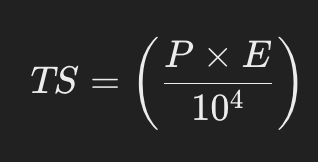

In [ ]:


import math

# Function to calculate Torino Scale
def calculate_torino_scale(ip, energy):
    # formula TS = log10(P * E)
    ts = math.log10(ip * energy)
    return ts

# Data for 101955 Bennu (1999 RQ36)
bennu_ip = 0.0003702  # Impact probability
bennu_energy = 1.421e+03  # Impact energy in megatons of TNT

# Data for 29075 (1950 DA)
da_ip = 0.0003968  # Impact probability
da_energy = 7.520e+04  # Impact energy in megatons of TNT

#Torino Scale values for both objects
bennu_ts = calculate_torino_scale(bennu_ip, bennu_energy)
da_ts = calculate_torino_scale(da_ip, da_energy)
print(f"Torino Scale for Bennu: {bennu_ts}")
print(f"Torino Scale for 29075: {da_ts}")


Torino Scale for Bennu: -0.2789695076556449
Torino Scale for 29075: 1.4747895040737833


What's the main takeaway?

On March 16, 2880, there's a small chance that we're cooked.

But it's gonna be fine...




Probably.

Ok let's experiment with the Close Approach Data (CAD) API and see if we can join it with our Fireball data.

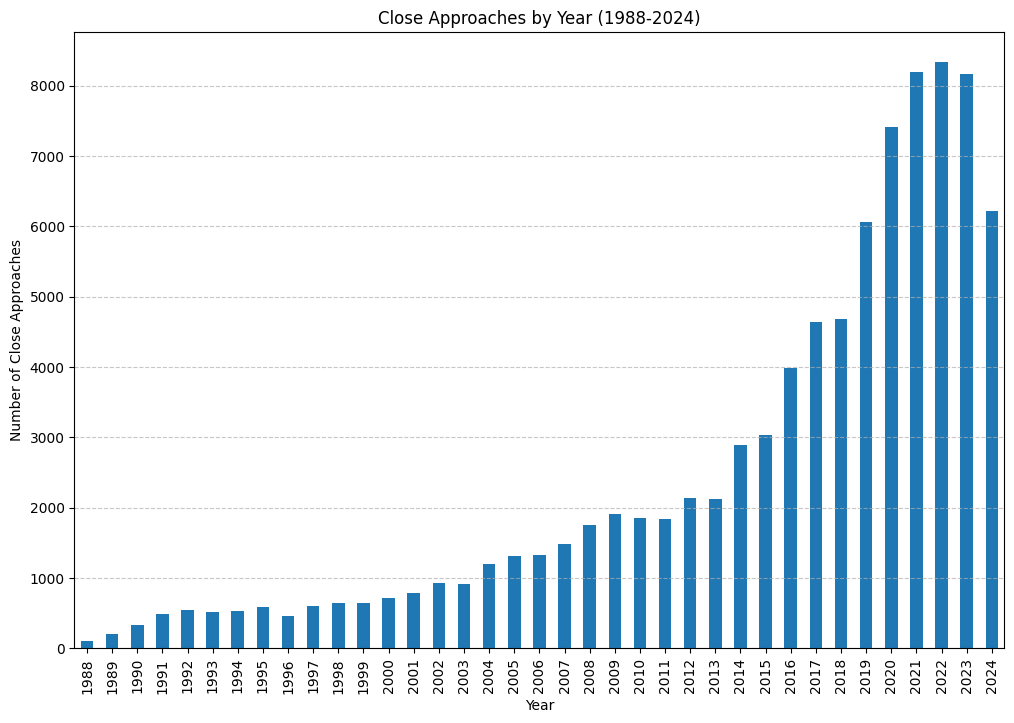

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
URL = "https://ssd-api.jpl.nasa.gov/cad.api"
def fetch_data(start_date, end_date):
    params = {
        "date-min": start_date,
        "date-max": end_date,
        "body": "Earth",
        "fullname": "true",
    }
    response = requests.get(URL, params=params)
    response.raise_for_status()
    return response.json()

#date range (1988 to 2024)
data = []
start_year = 1988
end_year = 2024
for year in range(start_year, end_year):
    start_date = f"{year}-01-01"
    end_date = f"{year+4}-12-31"
    fetched = fetch_data(start_date, end_date)
    data.extend(fetched.get("data", []))
columns = fetched["fields"]  #feilds as column and convert to dataframe
df_close_approaches = pd.DataFrame(data, columns=columns)

#year from the "cd" (calendar date) column
df_close_approaches["year"] = pd.to_datetime(df_close_approaches["cd"]).dt.year

# Filter range (1988 to 2024)
df_close_approaches = df_close_approaches[(df_close_approaches["year"] >= 1988) & (df_close_approaches["year"] <= 2024)]

plt.figure(figsize=(12, 8))
df_close_approaches["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Close Approaches by Year (1988-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Close Approaches")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


I'm curious to see how far away these 'close approaches' are from Earth.

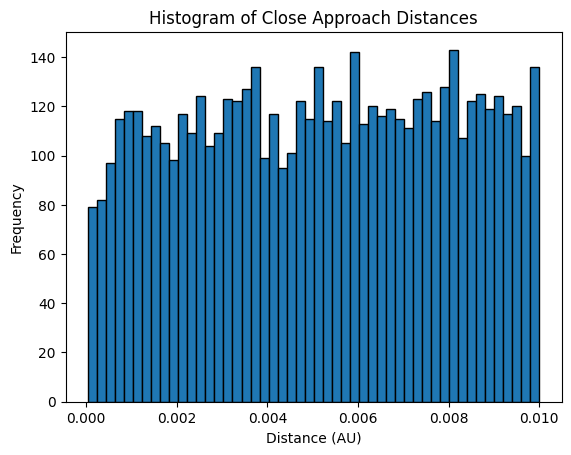

In [ ]:
import requests
import matplotlib.pyplot as plt

#set the max distance to 0.01 au
url = "https://ssd-api.jpl.nasa.gov/cad.api"
params = {"date-min": "1900-01-01", "date-max": "2100-01-01", "body": "Earth", "dist-max": "0.01", "fullname": "true"}
response = requests.get(url, params=params)
data = response.json()

if 'data' in data and isinstance(data['data'], list):
    distances = [float(approach[4]) for approach in data['data']]


    plt.hist(distances, bins=50, edgecolor='black')
    plt.title("Histogram of Close Approach Distances")
    plt.xlabel("Distance (AU)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No valid data returned from API or unexpected structure.")


lets filter our previous dataset and plot a new histogram of close approaches for objects that are closer than 0.01 AU from Earth, or 1/100th of the distance from Earth to the Sun.

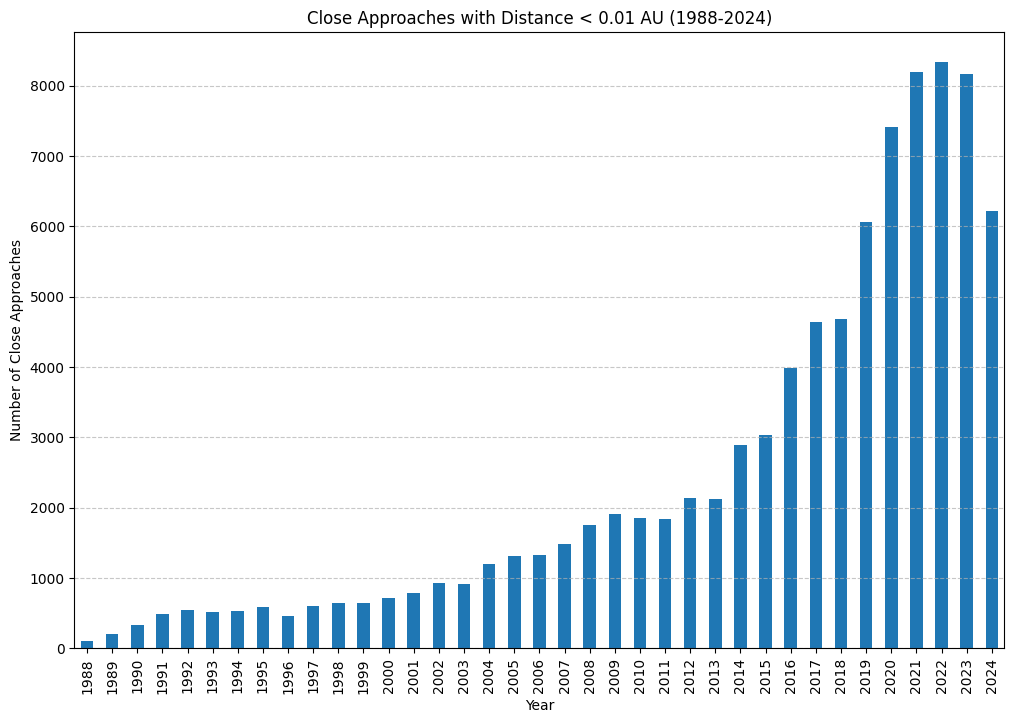

In [ ]:

df_close_approaches['dist'] = pd.to_numeric(df_close_approaches['dist'], errors='coerce')
df_close_approaches = df_close_approaches[df_close_approaches['dist'] < 0.1]
#New histogram with distances less than 0.01 au
plt.figure(figsize=(12, 8))
df_close_approaches["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Close Approaches with Distance < 0.01 AU (1988-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Close Approaches")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Lets do this with the Fireball API too.

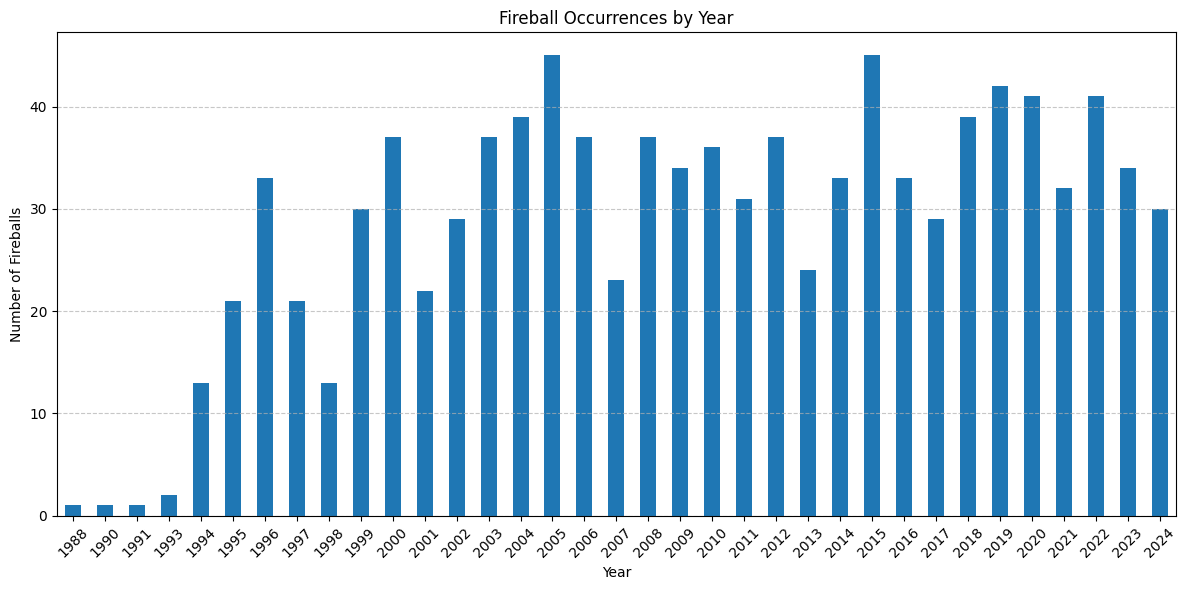

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


# dataframe
df_fireball = pd.DataFrame(records, columns=fields)

#parse
df_fireball["date"] = pd.to_datetime(df_fireball["date"])

# Extract the year from the date column
df_fireball["year"] = df_fireball["date"].dt.year

# fireball occurrences by year
plt.figure(figsize=(12, 6))
df_fireball["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Fireball Occurrences by Year")
plt.xlabel("Year")
plt.ylabel("Number of Fireballs")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


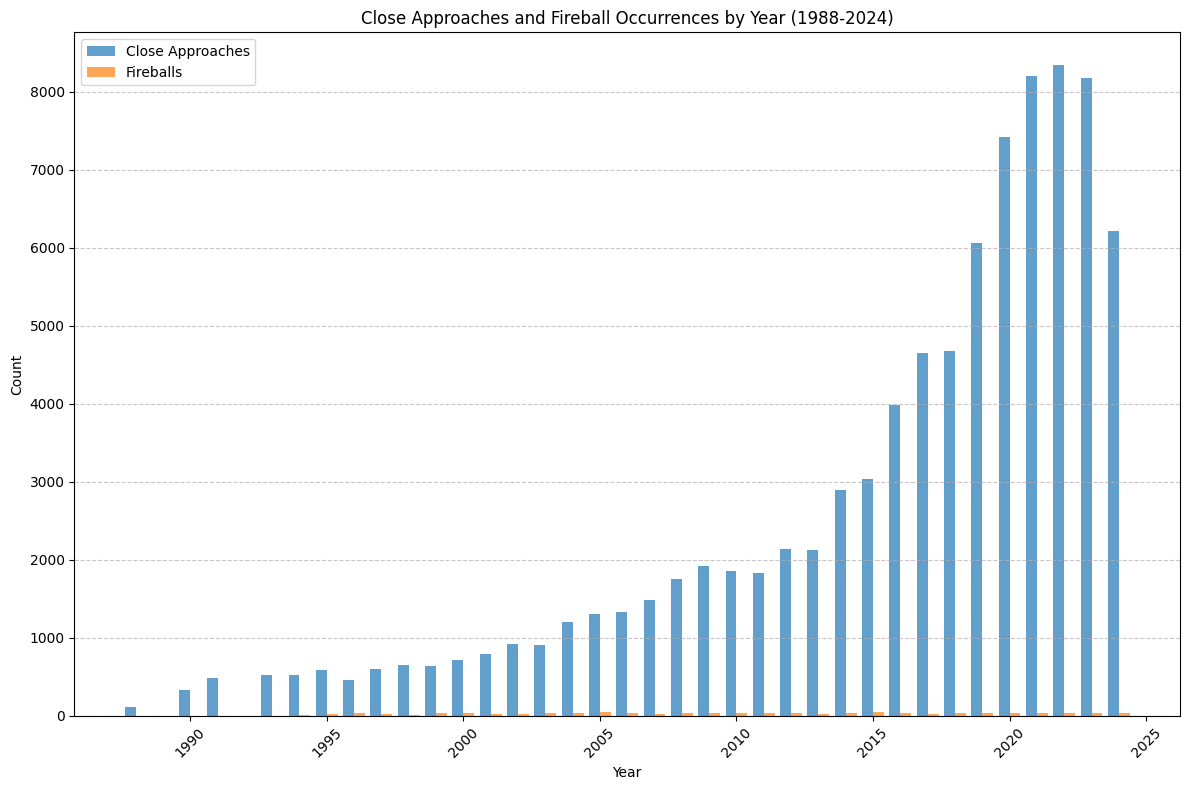

In [ ]:
import sqlite3
import pandas as pd

#SQL DATABASE
conn = sqlite3.connect(":memory:")  #in-memory database
cursor = conn.cursor()

#Group the data by year
df_close_approaches_count = df_close_approaches.groupby("year").size().reset_index(name="close_approach_count")
df_fireballs_count = df_fireball.groupby("year").size().reset_index(name="fireball_count")
#data frames as SQL tables
df_close_approaches_count.to_sql("close_approaches", conn, index=False, if_exists="replace")
df_fireballs_count.to_sql("fireballs", conn, index=False, if_exists="replace")

#SQL JOIN query on the year column
query = """
SELECT ca.year, ca.close_approach_count, fb.fireball_count
FROM close_approaches ca
JOIN fireballs fb
ON ca.year = fb.year
"""

#results into a DataFrame
merged_data = pd.read_sql(query, conn)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot close approaches and fireball occurrences
plt.bar(merged_data["year"] - 0.2, merged_data["close_approach_count"], width=0.4, label="Close Approaches", alpha=0.7)
plt.bar(merged_data["year"] + 0.2, merged_data["fireball_count"], width=0.4, label="Fireballs", alpha=0.7)

plt.title("Close Approaches and Fireball Occurrences by Year (1988-2024)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


conn.close()


Let's normalize these values

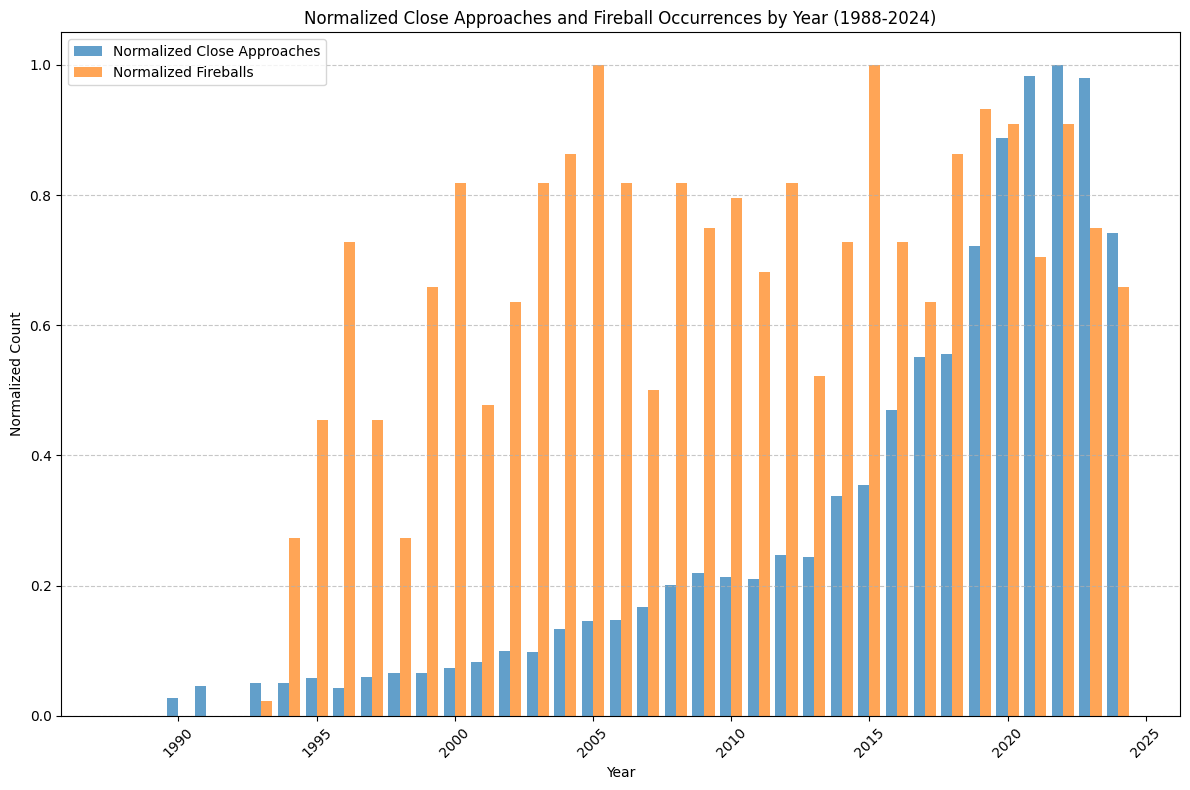

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler




scaler = MinMaxScaler()

# Normalize
merged_data[["close_approach_count", "fireball_count"]] = scaler.fit_transform(merged_data[["close_approach_count", "fireball_count"]])

# Plot the normalized data
plt.figure(figsize=(12, 8))
plt.bar(merged_data["year"] - 0.2, merged_data["close_approach_count"], width=0.4, label="Normalized Close Approaches", alpha=0.7)
plt.bar(merged_data["year"] + 0.2, merged_data["fireball_count"], width=0.4, label="Normalized Fireballs", alpha=0.7)

plt.title("Normalized Close Approaches and Fireball Occurrences by Year (1988-2024)")
plt.xlabel("Year")
plt.ylabel("Normalized Count")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Let's find out if there is any statistical association between the number of fireballs and the number of close approaches (closer than 0.01 AU) every year.

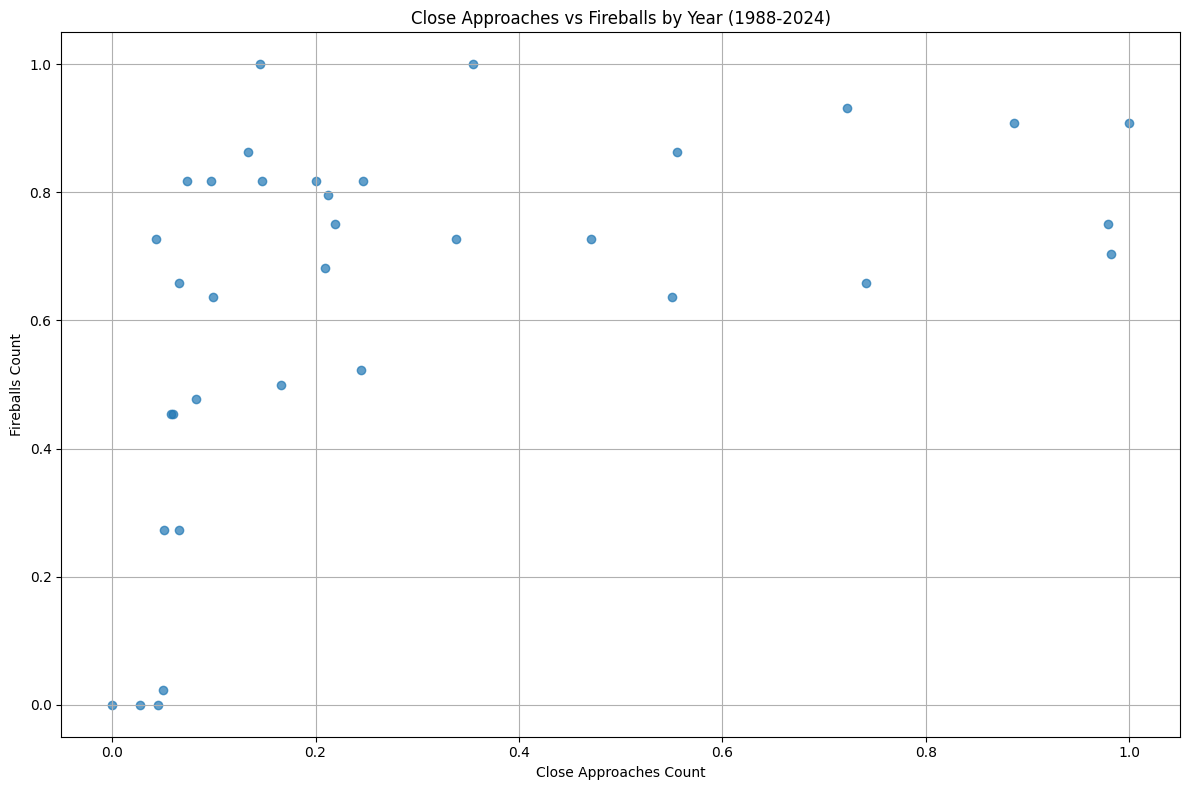

Correlation: 0.4695106698158712
P-value: 0.004434148302567155


In [ ]:

plt.figure(figsize=(12, 8))
plt.scatter(merged_data["close_approach_count"], merged_data["fireball_count"], alpha=0.7)
plt.title("Close Approaches vs Fireballs by Year (1988-2024)")
plt.xlabel("Close Approaches Count")
plt.ylabel("Fireballs Count")
plt.grid(True)
plt.tight_layout()
plt.show()

#correlation coefficient and p-value
from scipy.stats import pearsonr
correlation, p_value = pearsonr(merged_data["close_approach_count"], merged_data["fireball_count"])
print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")


Using NASA's data, we actually do find a statistically significant correlation between the number of close approaches of asteroids and comets, and the number of fireballs observed within a year. However, it is important to remember that correlation != causation, and there may be a confounding variable hidden here. The most notable being that as technology improves, humans have the ability to more accurately detect both fireballs and close approaches, which might be why we see both of these numbers increasing over time since the 80's. This would explain why we see a correlation between the two variables, without implying that there is a causal relationship between the two.